# Lista 5

## zadanie 1
Zaimplementuj generowanie próby trajektorii procesu Poissona na odcinku $[0, T]$ opierając się na znajomości rozkładu jego czasów oczekiwania.
1. Narysuj jego trajektorie.
2. Napisz algorytm obliczający wartości $N_t$, zweryfikuj, czy ma poprawny rozkład.

In [76]:
import numpy as np, math, matplotlib.pyplot as plt
from scipy.stats import expon, poisson

In [3]:
def gen_poiss(t, lam):
    wait = np.random.exponential(scale = 1/lam, size = t)
    wait = wait[wait<t]
    return np.cumsum(wait)

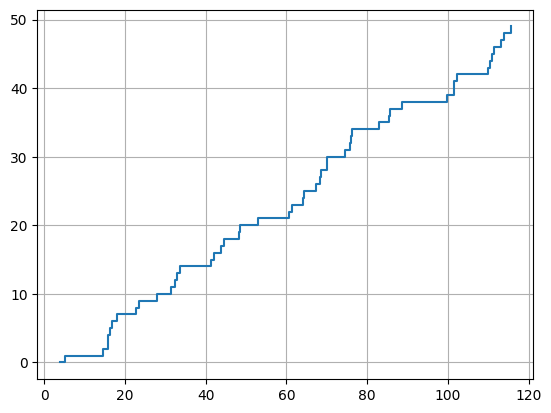

In [22]:
t = 50
lam = 0.5

p = gen_poiss(t, lam)

plt.step(p, range(len(p)), where='post')
# plt.plot(range(len(p)), p)
plt.grid(True)
plt.show()

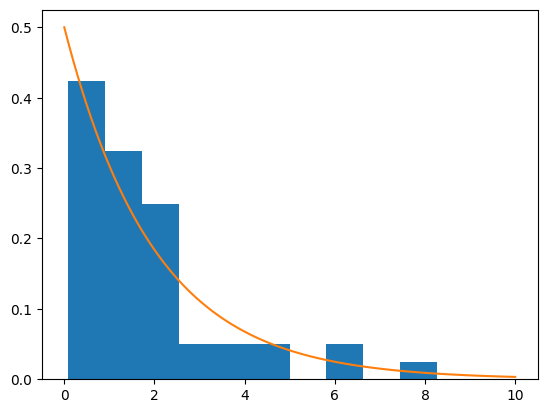

In [13]:
plt.hist(np.diff(p), density=True)
x=np.linspace(0,10,100)
plt.plot(x,expon.pdf(x, loc = 0, scale = 1/lam))

## zadanie 2
Zaimplementuj funkcję generującą trajektorie kompensowanego procesu
Poissona.

**Definicja** \
Niech $N_t$ będzie procesem Poissona z parametrem $λ > 0$. Kompensowanym procesem Poissona nazywamy proces $\widetilde N_t = N_t − λt$.


In [16]:
def compensated_poiss(t,lam):
    T = gen_poiss(t,lam)
    return [T[t] - lam*t for t in range(len(T))]

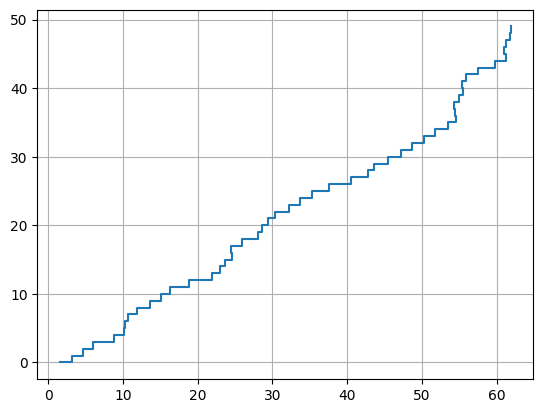

In [35]:
pcom = compensated_poiss(t, lam)

plt.step(pcom, range(len(pcom)), where='mid')
# o = range(len(pcom))
# plt.plot(o, pcom)
plt.grid(True)
plt.show()

### zadanie dodatkowe
**Twierdzenie** Jeśli $U_i$ są niezależnymi zmiennymi losowymi o rozkładzie $U(0,1)$ , to zmienna losowa $X = \max\{n: \prod^n_{j=1} U_j > e^{−λ}\}$ ma rozkład Poissona z parametrem $λ$.

Pseudokod do generowania zmiennych losowych z rozkładu Poissona dla niewielkich $λ > 0$.
1. Ustaw $n = 1, a = 1$.
2. Wygeneruj $U ∼ U(0, 1)$ i ustaw $a = a ∗ U$.
3. Jeśli $a \geqslant e^{−λ}$, ustaw $n = n + 1$ i wróć do 2.
4. W przeciwnym wypadku zwróć $X = n − 1$.

Powyższy pseudokod z oczywistych względów nie działa szybko dla dużych $λ > 0$.
W takim wypadku stosujemy następujący algorytm.
1. Ustaw $m = floor((7/8)λ)$.
2. Generuj $Y ∼ \Gamma(m, 1)$.
3. Jeśli $Y \leqslant λ$, to generuj za pomocą poprzedniego algorytmu $Z$ z rozkładu Poissona z parametrem $λ − Y$ i ustaw $X = m + Z$.
4. W przeciwnym wypadku generuj X z rozkładu dwumianowego  
$\ \text{Bin}(m−1, λ/Y )$.

**Zadanie dodatkowe** Za pomoca jednej z poznanych metod zaimplementuj generator liczb losowych z rozkładu Poissona.

In [48]:
def poiss_small(lam):
    n, a = 1, 1
    while a >= np.exp(-lam):
        n += 1
        u = np.random.uniform()
        a = a*u
    return n-1

In [41]:
def poiss_big(lam):
    m = np.floor(7/8*lam)
    Y = np.random.gamma(m,1)
    if Y <= lam:
        Z = poiss_small(lam-Y)
        return m + Z
    else:
        return np.random.binomial(m-1, lam/Y)

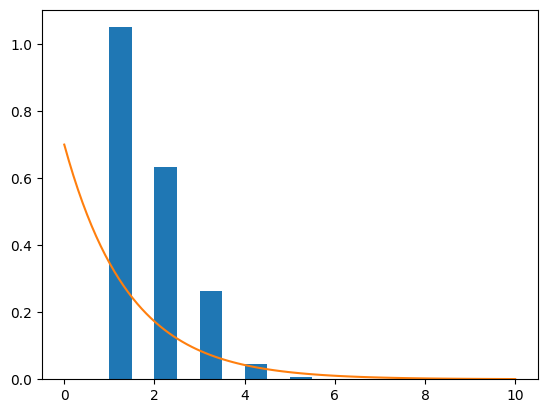

In [81]:
lam = 0.7
n = 1000
xs = np.linspace(0,10,100)
S = [poiss_small(lam) for _ in range(n)]
plt.hist(S, density=True)
plt.plot(xs,expon.pdf(xs, loc = 0, scale = 1/lam))

In [89]:
lam2 = 700
n = 1000
B = [poiss_small(lam2) for _ in range(n)]

(array([0.00045714, 0.00228571, 0.00805714, 0.0124    , 0.0144    ,
        0.01085714, 0.0064    , 0.0016    , 0.00051429, 0.00017143]),
 array([624. , 641.5, 659. , 676.5, 694. , 711.5, 729. , 746.5, 764. ,
        781.5, 799. ]),
 <BarContainer object of 10 artists>)

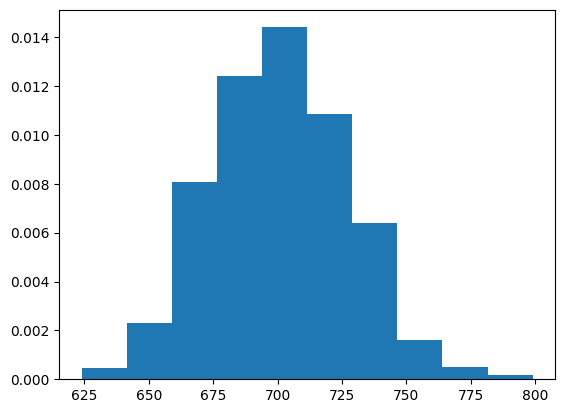

In [92]:
xs = np.linspace(0,1000,100)
plt.hist(B, density=True)
# plt.plot(xs, poisson.pmf(xs, lam2, loc=0))
# plt.plot(xs,expon.pdf(xs, loc = 0, scale = 1/lam2))